In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import rasterio
import gdal
from osgeo import gdal
from rasterio.plot import show
from osgeo import gdal_array
import sys

from scipy.stats import norm

from sklearn import svm, metrics
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import os
import glob
from sklearn.linear_model import LinearRegression
import math

### Multilayer Perceptron Regression

In [2]:
# try to get a list of all the rasters, then go through them, and for each i in the lsit, do a linear regression, 
# in essence make len(rasterweekend) lists with that pixels overall trends. Then do the linear regressionn to predict the next
# then put it back in a list in the same order, and compare


raster_folder = r'\\DATASERVER1\GADdata$\dgrant\Documents\ArcGIS\Projects\TestingMyProject\Las_Vegas_update\split_update\2012\all'
counter = 0
dont = 0
#year = 2018
listRaster = []
#listPixel = []
unflat = []
masterList = []
tempList = []
skipped = []

search_path = os.path.join(raster_folder, '*.tif')
print(search_path)
rasters = glob.glob(search_path)
for raster in rasters:
    raster_arr = gdal_array.LoadFile(raster)
    unflat = raster_arr
    raster_arr = raster_arr.flatten()
    listRaster.append(raster_arr)
   # plt.plot(raster_arr)
    #plt.show()
    

#listPixel.clear()


temp = gdal_array.LoadFile(r'Z:\GEOVIIRS\data\mexico\h06v06\h06v06\2012\019\DNB_Daily_Level3_h06v06.A2012019.5000.129_18_V25.tif')
temp = temp.flatten()
print(temp)


for i in range(100, 101):
    listPixel = []
    dont = 0
    for raster in listRaster:
        listPixel.append(raster[i])
    for each in listPixel:
        if each == -999:
            counter+=1
            if counter == len(listPixel):
                skipped.append(i)
               # print(i)
                dont = 1
                counter = 0
    if dont != 1:
        masterList.append(listPixel)


print(masterList)
print(skipped)  


                                                       

#print("each pixel of the same area for all the days")
#plt.plot(listPixel)
#plt.show()
        


\\DATASERVER1\GADdata$\dgrant\Documents\ArcGIS\Projects\TestingMyProject\Las_Vegas_update\split_update\2012\all\*.tif
[  0.   0.   0. ...   3.   3. 255.]
[[0.06349229, 0.17508228, 0.033191774, 0.1545797, 0.07088015, 0.04612945, 0.2657767, 0.07183464, 0.18094125, 0.18140094, 0.036165822, 0.4544356, 0.103580855, 0.060848292, 0.08035943, 0.03165819, 0.19764052, 0.026358986, 0.23141998, 0.10576955, 0.15035877, 0.27556226, 0.10165055, 0.22496396, 0.26097625, 0.11165007, 0.10681989, 0.2461251, 0.11590783, 0.09289709, 0.3239992, 0.10122638, 0.057938647, 0.16061138, 0.10122638, 0.049298167, 0.25456387, 0.31485137, 0.069937795, 0.07558886, 0.20207511, 0.4289099, 0.06399763, 0.100836776, 0.10122638, 0.055105418, 0.053970538, 0.055064484, 0.12275204, 0.033658788, 0.12667474, 0.33398232, 0.14841507, 0.05094282, 0.44751894, 0.1525123, 0.12439563, 0.19001375, 0.6700417, 0.13566165, 0.07459369, 0.053007394, 0.04179398, 0.080307275, 0.28567487, 0.13912444, 0.11590783, 0.038500186, 0.09048285, 0.090519

227 113
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 3s - loss: 0.0203
Epoch 2/200
 - 0s - loss: 0.0117
Epoch 3/200
 - 0s - loss: 0.0112
Epoch 4/200
 - 0s - loss: 0.0110
Epoch 5/200
 - 0s - loss: 0.0109
Epoch 6/200
 - 0s - loss: 0.0109
Epoch 7/200
 - 0s - loss: 0.0109
Epoch 8/200
 - 0s - loss: 0.0108
Epoch 9/200
 - 0s - loss: 0.0108
Epoch 10/200
 - 0s - loss: 0.0108
Epoch 11/200
 - 0s - loss: 0.0108
Epoch 12/200
 - 0s - loss: 0.0107
Epoch 13/200
 - 0s - loss: 0.0108
Epoch 14/200
 - 0s - loss: 0.0107
Epoch 15/200
 - 0s - loss: 0.0108
Epoch 16/200
 - 0s - loss: 0.0107
Epoch 17/200
 - 0s - loss: 0.0107
Epoch 18/200
 - 0s - loss: 0.0108
Epoch 19/200
 - 0s - loss: 0.0107
Epoch 20/200
 - 0s - loss: 0.0107
Epoch 21/200
 - 0s - loss: 0.0107
Epoch 22/200
 - 0s - loss: 0.0107
Epoch 23/200
 - 0s - loss: 0.0107
Epoch 24/200
 - 0s - loss: 0.0107
Epoch 25/200
 - 0s - loss: 0.0108
Epoch 26/200
 - 0s - loss: 0.01

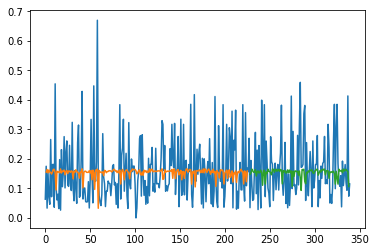

In [5]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
#dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
df = pd.DataFrame(listPixel) 
df 

dataset = df.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()